In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
home_data = pd.read_csv('train.csv', index_col=0)


C:\Users\hp\AppData\Local\Temp\ipykernel_14440\515486490.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target, label='Original')
C:\Users\hp\AppData\Local\Temp\ipykernel_14440\515486490.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(target), label='Log-transformed')


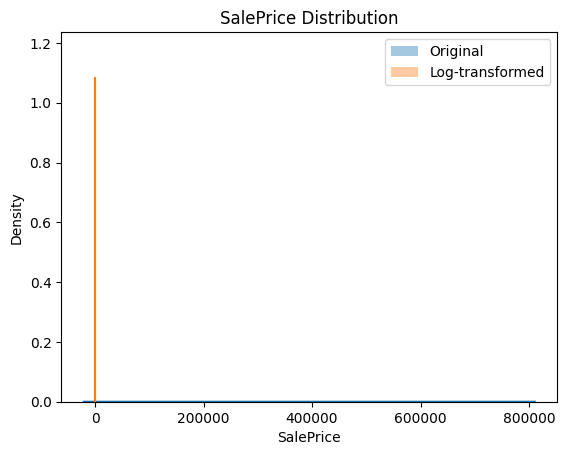

In [3]:
target = home_data['SalePrice']
sns.distplot(target, label='Original')
sns.distplot(np.log(target), label='Log-transformed')
plt.legend()
plt.title('SalePrice Distribution')
plt.show()

In [4]:
num_columns = home_data.select_dtypes(exclude='object').columns
cat_columns = home_data.select_dtypes(include='object').columns

In [5]:
home_data_copy = home_data.copy()
home_data_copy['MasVnrArea'] = home_data_copy['MasVnrArea'].fillna(0)
home_data_copy[cat_columns] = home_data_copy[cat_columns].fillna("None")

In [6]:
outlier_cols = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'LowQualFinSF']
for col in outlier_cols:
    home_data_copy = home_data_copy.drop(home_data_copy[home_data_copy[col] > home_data_copy[col].quantile(0.95)].index)


In [7]:
home_data_copy['SalePrice_log'] = np.log(home_data_copy['SalePrice'])


In [8]:
drop_cols = ['SalePrice', 'MiscVal', 'MSSubClass', 'MoSold', 'YrSold', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd']
X = home_data_copy.drop(drop_cols, axis=1)

In [9]:
y = home_data_copy['SalePrice_log']
X = pd.get_dummies(X)

In [10]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)


In [11]:
imputer = SimpleImputer()
train_X = imputer.fit_transform(train_X)
val_X = imputer.transform(val_X)

In [12]:
def inv_y(transformed_y):
    return np.exp(transformed_y)

In [13]:
def train_and_evaluate_model(model, train_X, train_y, val_X, val_y):
    model.fit(train_X, train_y)
    val_predictions = model.predict(val_X)
    return mean_absolute_error(inv_y(val_predictions), inv_y(val_y))
mae_compare = pd.Series()

In [14]:
linear_model = LinearRegression()
mae_compare['LinearRegression'] = train_and_evaluate_model(linear_model, train_X, train_y, val_X, val_y)


In [15]:
rf_model = RandomForestRegressor(random_state=5)
mae_compare['RandomForest'] = train_and_evaluate_model(rf_model, train_X, train_y, val_X, val_y)


In [16]:
dt_model = DecisionTreeRegressor(random_state=1)
mae_compare['DecisionTree'] = train_and_evaluate_model(dt_model, train_X, train_y, val_X, val_y)

In [17]:
print('MAE values for different algorithms:')
print(mae_compare.sort_values(ascending=True).round(2))

MAE values for different algorithms:
LinearRegression      0.00
RandomForest        215.62
DecisionTree        412.30
dtype: float64
